In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Total Population US Census 2017-2060 data
pop_df = pd.read_csv("Resources/Census-Population-By-Age-2016-2060_np2017_d1.csv")

# display data
pop_df.head()

,SEX,ORIGIN,RACE,YEAR,TOTAL_POP,POP_0,POP_1,POP_2,POP_3,POP_4,...,POP_91,POP_92,POP_93,POP_94,POP_95,POP_96,POP_97,POP_98,POP_99,POP_100
0,0,0,0,2016,323127513,3970145,3995008,3992154,3982074,3987656,...,449986,372625,300000,239313,186408,135797,94311,68972,44895,81896
1,0,0,0,2017,325511184,4054035,3982964,4008116,4003478,3992207,...,449945,382669,311525,246219,192531,146801,104540,70840,50486,83574
2,0,0,0,2018,327891911,4075563,4068172,3995888,4019345,4013649,...,462335,382993,320285,256011,198354,151848,113165,78659,51938,86221
3,0,0,0,2019,330268840,4095614,4089881,4082231,4006967,4029427,...,467488,393919,320884,263533,206526,156654,117240,85265,57778,87671
4,0,0,0,2020,332639102,4113164,4110117,4104058,4094281,4016919,...,464985,398712,330389,264318,212880,163348,121128,88491,62724,92064


In [3]:
# filter data to show total pop data for both males and females together. In census total pop dataset:
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races;
# origin == 0 is for both hispanic and non-hispanic;
# race == 0 is for all races.
pop_df = pop_df.loc[(pop_df['SEX'] == 0) & (pop_df['ORIGIN'] == 0) & (pop_df['RACE'] == 0),:]
pop_df.head()

,SEX,ORIGIN,RACE,YEAR,TOTAL_POP,POP_0,POP_1,POP_2,POP_3,POP_4,...,POP_91,POP_92,POP_93,POP_94,POP_95,POP_96,POP_97,POP_98,POP_99,POP_100
0,0,0,0,2016,323127513,3970145,3995008,3992154,3982074,3987656,...,449986,372625,300000,239313,186408,135797,94311,68972,44895,81896
1,0,0,0,2017,325511184,4054035,3982964,4008116,4003478,3992207,...,449945,382669,311525,246219,192531,146801,104540,70840,50486,83574
2,0,0,0,2018,327891911,4075563,4068172,3995888,4019345,4013649,...,462335,382993,320285,256011,198354,151848,113165,78659,51938,86221
3,0,0,0,2019,330268840,4095614,4089881,4082231,4006967,4029427,...,467488,393919,320884,263533,206526,156654,117240,85265,57778,87671
4,0,0,0,2020,332639102,4113164,4110117,4104058,4094281,4016919,...,464985,398712,330389,264318,212880,163348,121128,88491,62724,92064


Text(0, 0.5, 'Population')

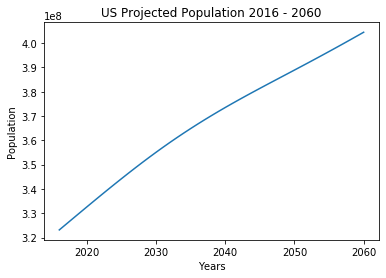

In [4]:
# assign x and y values to prepare to plot graph
year = pop_df['YEAR']
pop = pop_df['TOTAL_POP']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, pop)
plt.title('US Projected Population 2016 - 2060')
plt.xlabel('Years')
plt.ylabel('Population')


In [5]:
# calculate growth 
growth_df = pop_df.copy()
growth_df = growth_df.loc[(growth_df['SEX'] == 0) & (pop_df['ORIGIN'] == 0) & (pop_df['RACE'] == 0), :]
growth_df = pop_df.iloc[:, 3:5]

growth_df

,YEAR,TOTAL_POP
0,2016,323127513
1,2017,325511184
2,2018,327891911
3,2019,330268840
4,2020,332639102
5,2021,334998398
6,2022,337341954
7,2023,339665118
8,2024,341963408
9,2025,344234377


In [15]:
total_pop = growth_df['TOTAL_POP'].tolist()
growth_initial = total_pop[1] - total_pop[0]


growth_rate = []
avg_growth_rate = 0

for x in range(0,len(total_pop)):
    if x == 0:
        growth_rate.append(growth_initial)
    else:
        growth_rate.append(total_pop[x] - total_pop[x-1])
    avg_growth_rate = int((growth_rate[x] + growth_rate[x-1])/2)

growth_rate_change = []
avg_growth_rate_change = 0
growth_rate_change_initial = growth_rate[0] - growth_rate[1]
for x in range(0,len(growth_rate)):
    if x == 0:
        growth_rate_change.append(growth_rate_change_initial)
    else:
        growth_rate_change.append(growth_rate[x-1] - growth_rate[x])
    avg_growth_rate_change = int((growth_rate_change[x-1] + growth_rate_change[x])/2)

#print(avg_growth_rate)
#print(avg_growth_rate_change) 

In [16]:
proj_pop = total_pop.copy()
proj_year = growth_df['YEAR'].tolist()

new_growth_rate = avg_growth_rate
while new_growth_rate > 0:
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change    

#print(proj_pop)
#print(proj_year)

Text(0, 0.5, 'Population')

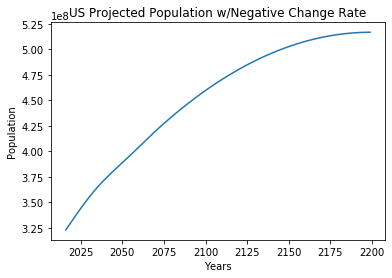

In [19]:
# plot data using line graph
ax, fig = plt.subplots()
plt.plot(proj_year, proj_pop)
plt.title('US Projected Population w/Negative Change Rate')
plt.xlabel('Years')
plt.ylabel('Population')
